**Importing Necessary Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random

import warnings
warnings.simplefilter('ignore')

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


**Data preparation**

In [2]:
Y_train = train['label']
X_train = train.drop('label',axis=1)
del train

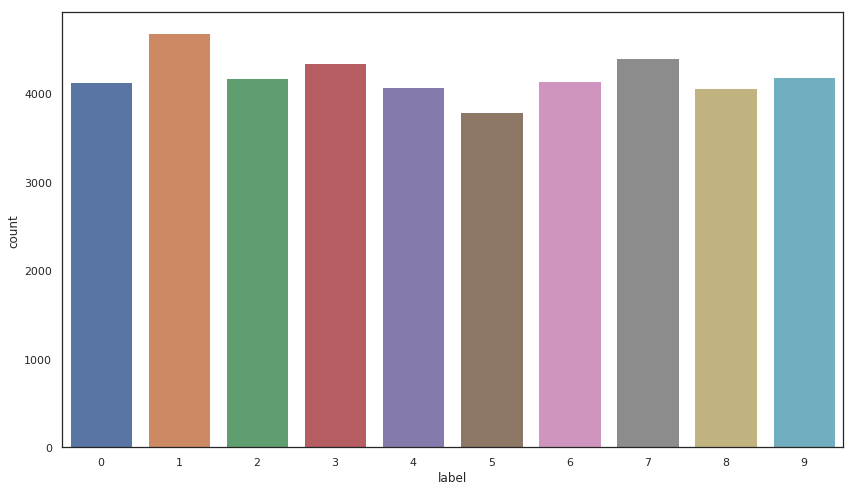

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [3]:
plt.figure(figsize=(14,8))
graf = sns.countplot(Y_train, palette="deep")
plt.show()
Y_train.value_counts()

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

**Normalization**

In [6]:
X_train = X_train/255.0
test = test / 255.0

**Reshape**

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

** Label encoding**

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

** Split training and valdiation set**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
X_train, X_val, Y_train, Y_val =train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

**Data Visualization**

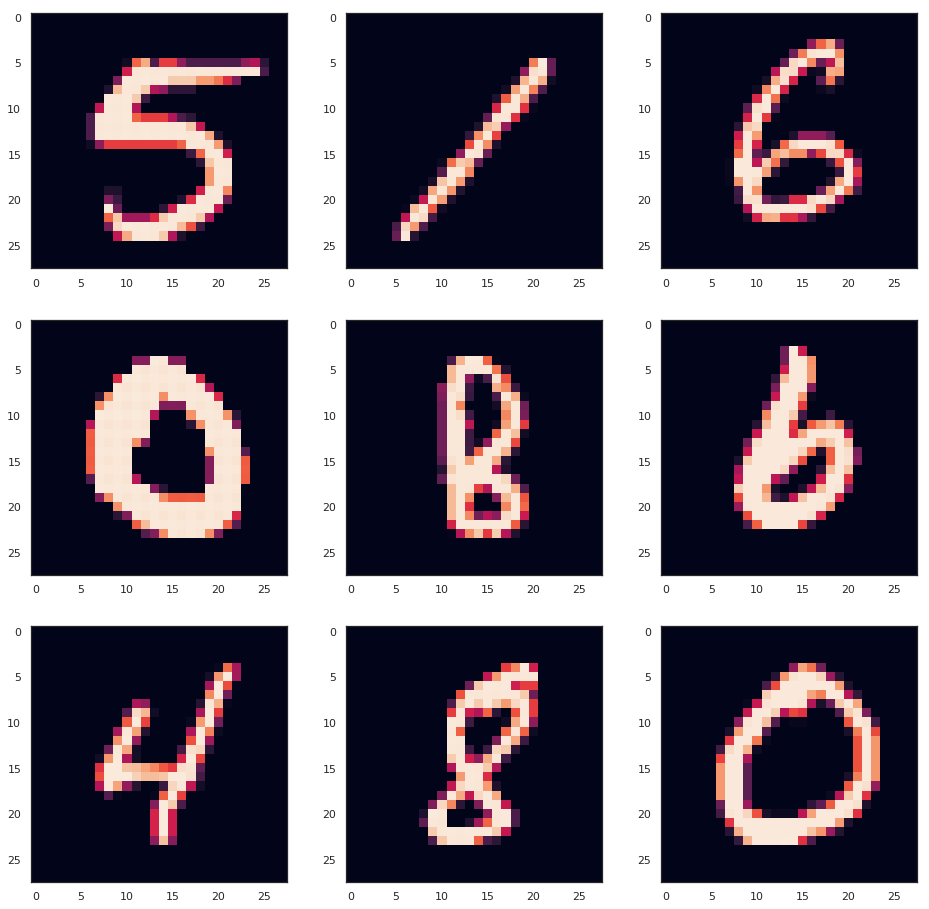

In [10]:
fig=plt.figure(figsize=(16, 16))
for i in range(1,10):
    rand_num = random.randint(0,25000)
    fig.add_subplot(3, 3, i)
    img_number = plt.imshow(X_train[rand_num][:,:,0])

**Convolutional Neural Networks**

In [11]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
__________

**Data augmentation**

In [13]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

**Hyperparameters **

In [14]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


In [15]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])


In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
epochs = 20
batch_size = 16

**Fitting a model**

In [18]:
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                           steps_per_epoch=X_train.shape[0] // batch_size,
                           epochs=epochs, 
                           verbose=2,
                           validation_data=(X_val,Y_val), 
                           callbacks=[learning_rate_reduction])

Epoch 1/20
 - 93s - loss: 0.8952 - acc: 0.7091 - val_loss: 0.1458 - val_acc: 0.9537
Epoch 2/20
 - 84s - loss: 0.2778 - acc: 0.9122 - val_loss: 0.0969 - val_acc: 0.9696
Epoch 3/20
 - 83s - loss: 0.1876 - acc: 0.9410 - val_loss: 0.0547 - val_acc: 0.9825
Epoch 4/20
 - 85s - loss: 0.1506 - acc: 0.9533 - val_loss: 0.0363 - val_acc: 0.9885
Epoch 5/20
 - 86s - loss: 0.1199 - acc: 0.9620 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 6/20
 - 86s - loss: 0.1053 - acc: 0.9676 - val_loss: 0.0280 - val_acc: 0.9918
Epoch 7/20
 - 85s - loss: 0.0917 - acc: 0.9726 - val_loss: 0.0270 - val_acc: 0.9919
Epoch 8/20
 - 84s - loss: 0.0896 - acc: 0.9735 - val_loss: 0.0221 - val_acc: 0.9929
Epoch 9/20
 - 84s - loss: 0.0783 - acc: 0.9749 - val_loss: 0.0246 - val_acc: 0.9929
Epoch 10/20
 - 84s - loss: 0.0718 - acc: 0.9779 - val_loss: 0.0228 - val_acc: 0.9925
Epoch 11/20
 - 85s - loss: 0.0695 - acc: 0.9789 - val_loss: 0.0210 - val_acc: 0.9932
Epoch 12/20
 - 84s - loss: 0.0691 - acc: 0.9795 - val_loss: 0.0188 - val_a

**Confusion matrix**

Text(0.5, 10.479184719828693, 'Predicted label')

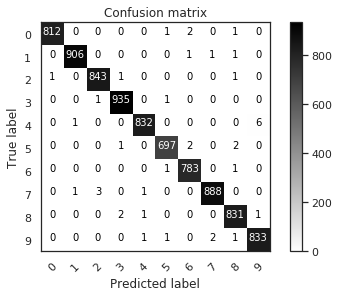

In [19]:
Y_hat = model.predict(X_val)
Y_pred = np.argmax(Y_hat, axis=1)
Y_true = np.argmax(Y_val, axis=1)
cm = confusion_matrix(Y_true, Y_pred)
classes = range(10)
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.gray_r)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

**Training and validation curves**

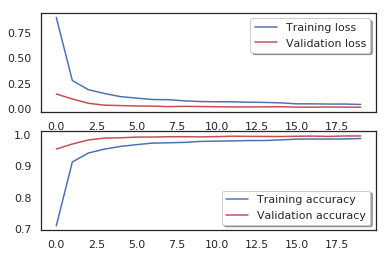

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['acc'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Prediction **

In [21]:
predicted_classes = model.predict_classes(test)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submissions.csv", index=False, header=True)

In [22]:
model.save('my_model.h5')
json_string = model.to_json()